In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [18]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


<AxesSubplot:>

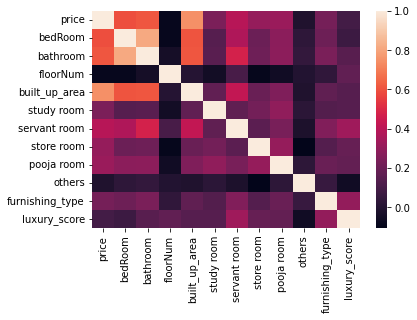

In [20]:
sns.heatmap(train_df.corr())

In [21]:
train_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [22]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

### luxury score

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

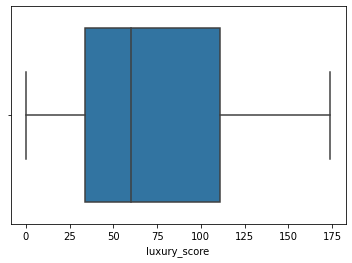

In [23]:
sns.boxplot(df['luxury_score'])

In [24]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return 'Low'
    elif 50 <= score < 150:
        return 'Medium'
    elif 150 <= score <= 175:
        return 'High'
    else:
        return None # or 'Undefined' or any other label for scores outside the defined bins

In [25]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [26]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


### floorNum

In [29]:
def categorizeFloor(floor):
    if 0 <= floor < 2:
        return 'Low Floor'
    elif 3 <= floor < 10:
        return 'Med Floor'
    elif 11 <= floor <= 51 :
        return 'High Floor'
    else:
        return None # or 'Undefined' or any other label for scores outside the defined bins

In [30]:
train_df['floor_category'] = train_df['floorNum'].apply(categorizeFloor)

In [31]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [32]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,None
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Med Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,None
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Med Floor


In [66]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [67]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [68]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

## Technique 1 - Correlation Analysis

<AxesSubplot:>

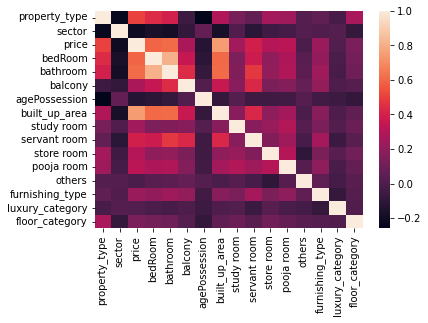

In [69]:
sns.heatmap(data_label_encoded.corr())

In [70]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [95]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650506
1,sector,0.101661
0,property_type,0.100131
3,bathroom,0.025518
2,bedRoom,0.024014
8,servant room,0.018965
5,agePossession,0.013727
4,balcony,0.011854
12,furnishing_type,0.010274
14,floor_category,0.010153


## Technique 3 - Gradient Boosting Feature importances

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.678479
1,sector,0.102266
0,property_type,0.098218
2,bedRoom,0.037551
3,bathroom,0.036358
8,servant room,0.023129
9,store room,0.010592
5,agePossession,0.003680
7,study room,0.003009
12,furnishing_type,0.002532


## Technique 4 - Permutation Importance

In [78]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.743073
0,property_type,0.200326
1,sector,0.179829
3,bathroom,0.021128
2,bedRoom,0.020103
8,servant room,0.019084
5,agePossession,0.005748
14,floor_category,0.003804
9,store room,0.001554
13,luxury_category,0.001465


### Technique 5 - LASSO

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510804
0,property_type,0.711680
3,bathroom,0.275007
9,store room,0.199268
7,study room,0.171372
12,furnishing_type,0.164181
8,servant room,0.160503
10,pooja room,0.074092
13,luxury_category,0.055181
2,bedRoom,0.014068


### Technique 6 - RFE

In [84]:
selector_label.estimator_.feature_importances_

array([0.10037872, 0.10355082, 0.02957532, 0.02287025, 0.01110483,
       0.01411765, 0.64750719, 0.00869252, 0.01967103, 0.00544629,
       0.00620553, 0.00272664, 0.01085333, 0.00705194, 0.01024795])

In [85]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.650638
0,property_type,0.101512
1,sector,0.101203
2,bedRoom,0.025297
3,bathroom,0.022760
8,servant room,0.018181
5,agePossession,0.013509
4,balcony,0.011928
14,floor_category,0.010796
12,furnishing_type,0.009944


## Technique 7 - Linear Regression Weights

In [87]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.514684
0,property_type,0.707864
3,bathroom,0.281018
9,store room,0.203019
7,study room,0.178644
12,furnishing_type,0.173444
8,servant room,0.169500
10,pooja room,0.077732
13,luxury_category,0.066327
2,bedRoom,0.016737


## Technique 8 - SHAP

In [88]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/1e/86/d41993abadf5f31173066b1d32ee1a944545144d448f4a11d68f730f38f5/shap-0.43.0-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 447.3/447.3 kB 3.1 MB/s eta 0:00:00


In [89]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.88229024e-01,  1.48544019e-01, -3.27978172e-02, ...,
        -1.23538784e-02, -3.54488402e-03,  1.65212579e-03],
       [-2.02342862e-01, -3.86954981e-01, -4.53357000e-02, ...,
        -1.10742340e-02, -4.60080971e-03, -5.07534978e-03],
       [-1.75892775e-01, -4.11633841e-01, -4.35852592e-02, ...,
        -1.32763346e-02, -1.39368696e-02, -2.17556500e-02],
       ...,
       [-1.82990145e-01,  6.81126499e-02, -1.47125237e-03, ...,
         6.48188576e-03,  1.55703436e-02, -1.52835280e-02],
       [ 1.56789566e+00,  9.75029790e-01,  3.71372183e-01, ...,
         1.09593833e-01,  1.05837475e-02,  2.61617885e-02],
       [-2.87064195e-01,  2.05808867e-02, -1.90628032e-02, ...,
         1.67167297e-03, -7.81839008e-03,  2.23473623e-02]])

In [90]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.255878
0,property_type,0.468217
1,sector,0.379442
3,bathroom,0.111592
8,servant room,0.093603
2,bedRoom,0.048721
4,balcony,0.040033
14,floor_category,0.030323
12,furnishing_type,0.027380
5,agePossession,0.027064


In [97]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.101661,0.102266,0.179829,-0.069392,0.101203,-0.078069,0.379442
bedRoom,0.591289,0.024014,0.037551,0.020103,0.014068,0.025297,0.016737,0.048721
bathroom,0.609777,0.025518,0.036358,0.021128,0.275007,0.022760,0.281018,0.111592
balcony,0.269637,0.011854,0.001975,0.000500,-0.043949,0.011928,-0.067519,0.040033
agePossession,-0.134171,0.013727,0.003680,0.005748,-0.000000,0.013509,-0.001226,0.027064
built_up_area,0.748574,0.650506,0.678479,0.743073,1.510804,0.650638,1.514684,1.255878
study room,0.242955,0.008503,0.003009,-0.017839,0.171372,0.008798,0.178644,0.019296
servant room,0.391930,0.018965,0.023129,0.019084,0.160503,0.018181,0.169500,0.093603
store room,0.305677,0.008024,0.010592,0.001554,0.199268,0.008364,0.203019,0.015781


In [98]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.713813
sector             0.141348
bathroom           0.033878
bedRoom            0.028123
servant room       0.026319
agePossession      0.010659
balcony            0.009675
floor_category     0.008657
store room         0.007830
furnishing_type    0.005996
luxury_category    0.005126
pooja room         0.003647
study room         0.002688
others             0.002241
dtype: float64

In [93]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [104]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

0.8204859691056438

In [105]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room','others']), y_label, cv=5, scoring='r2')
scores.mean()

0.8190995495039749

In [106]:
export_df = X_label.drop(columns=['pooja room', 'study room','others'])
export_df['price'] = y_label

In [107]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [108]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,3.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,3.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,3.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
